In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm,skew
from scipy import stats
color=sns.color_palette()
sns.set_style('darkgrid')

In [36]:
trainpath=r'E:\mylearn\kaggle\houseprice\train.csv'
testpath=r'E:\mylearn\kaggle\houseprice\test.csv'

In [37]:
train=pd.read_csv(trainpath)
test=pd.read_csv(testpath)

In [38]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [39]:
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [40]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [41]:
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [42]:
# check the number of samples and features
print("The train data size before dropping Id feature is : {}".format(train.shape))
print("The test data size before dropping Id feature is : {}".format(test.shape))

The train data size before dropping Id feature is : (1460, 81)
The test data size before dropping Id feature is : (1459, 80)


In [43]:
# save id column
train_ID=train['Id']
test_ID=test['Id']

In [44]:
#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)
#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))


The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 79) 


In [45]:
# 1 Delete outliers

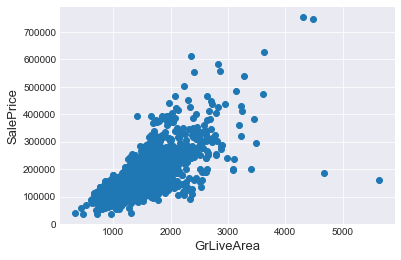

In [46]:
fig,ax=plt.subplots()
ax.scatter(x=train['GrLivArea'],y=train['SalePrice'])
plt.ylabel('SalePrice',fontsize=13)
plt.xlabel('GrLiveArea',fontsize=13)
plt.show()


In [47]:
train=train.drop(train[(train['GrLivArea']>4000)&(train['SalePrice']<300000)].index)

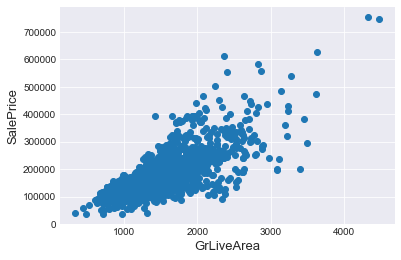

In [48]:
# check outlier detection
fig,ax=plt.subplots()
ax.scatter(x=train['GrLivArea'],y=train['SalePrice'])
plt.ylabel('SalePrice',fontsize=13)
plt.xlabel('GrLiveArea',fontsize=13)
plt.show()

In [49]:
###对y变量的分析


 mu=180932.92 and sigma=79467.79



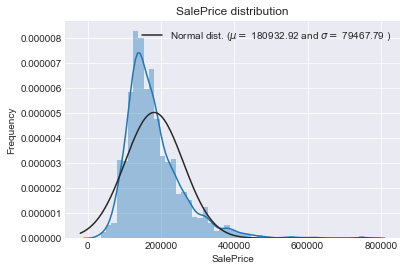

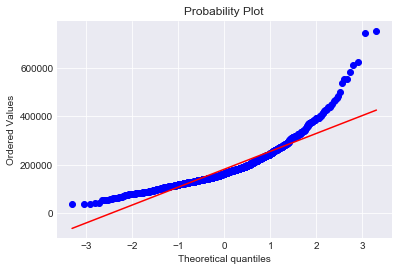

In [50]:
sns.distplot(train['SalePrice'],fit=norm)
(mu,sigma) =norm.fit(train['SalePrice'])
print('\n mu={:.2f} and sigma={:.2f}\n'.format(mu,sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [51]:
#对变量进行log变换


 mu = 12.02 and sigma = 0.40



Text(0.5,1,'SalePrice distribution')

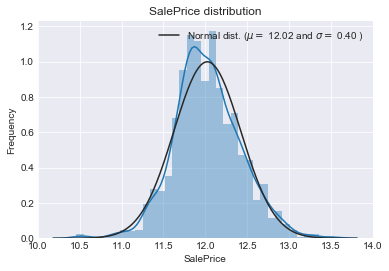

In [52]:
train['SalePrice']=np.log1p(train['SalePrice'])
#check the new distribution
sns.distplot(train['SalePrice'],fit=norm)
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

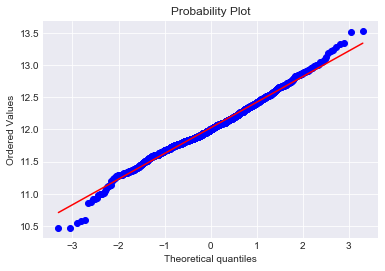

In [53]:
#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [54]:
# Feature engineering

In [55]:
ntrain=train.shape[0]
ntest = test.shape[0]
print(ntrain,ntest)

1458 1459


In [56]:
y_train=train.SalePrice.values  #直接将Series转为numpy

In [61]:
all_data=pd.concat((train,test)).reset_index(drop=True)

all_data.drop(['SalePrice'],axis=1,inplace=True)
print("all_data size is :{}".format(all_data.shape))

all_data size is :(2917, 79)


In [63]:
## 1- missing data

In [66]:
all_data_na=(all_data.isnull().sum()/len(all_data))*100

In [70]:
all_data_na=all_data_na.drop(all_data_na[all_data_na==0].index).sort_values(ascending=False)[:30]

In [72]:
all_data_na=pd.DataFrame({'Missing Ratio':all_data_na})

In [73]:
all_data_na

,Missing Ratio
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageQual,5.450806
GarageCond,5.450806
GarageFinish,5.450806
GarageYrBlt,5.450806


Text(0.5,1,'Percent missing data by feature')

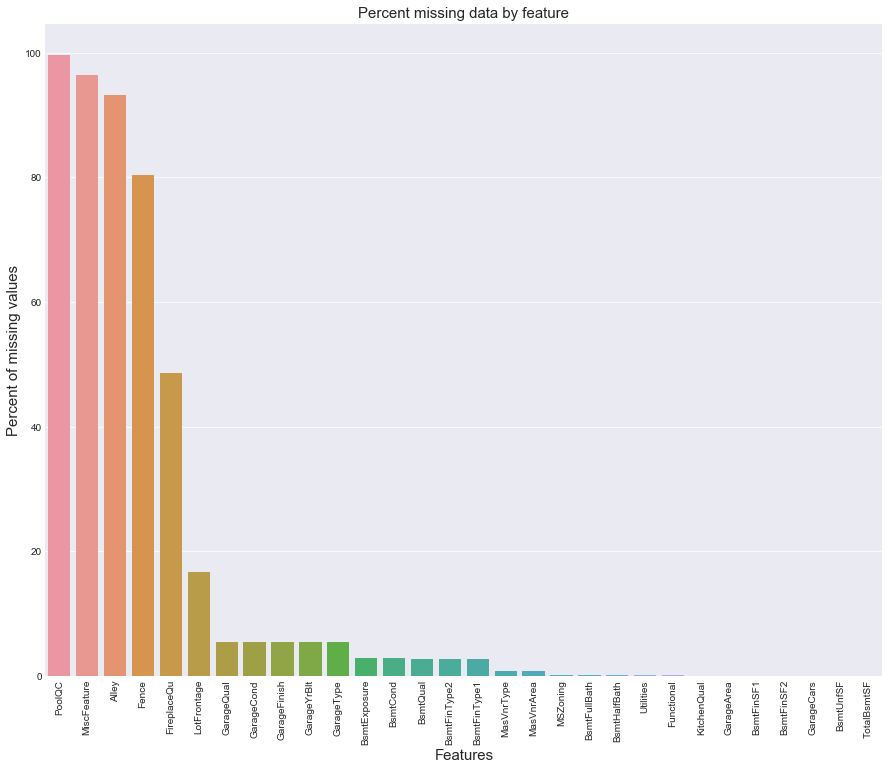

In [76]:
##画图展示丢失率
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na['Missing Ratio'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [77]:
###训练数据各指标的关联性

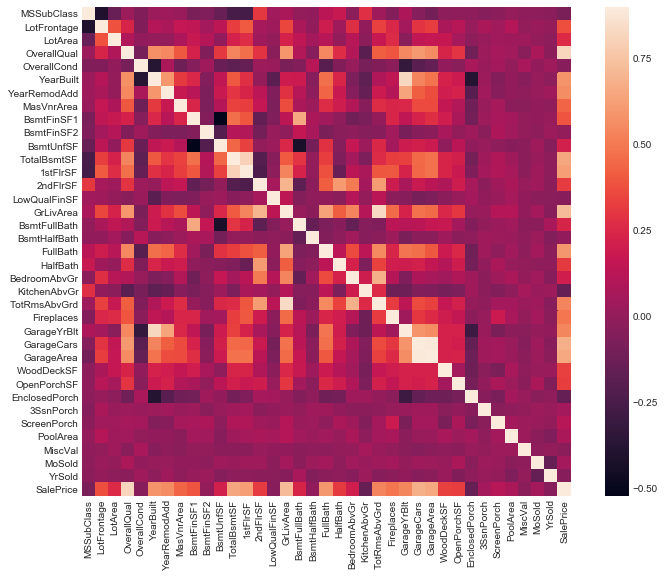

In [78]:
corrmat=train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,vmax=0.9,square=True)

In [79]:
##对缺失数据的处理

In [82]:
all_data['PoolQC'] =all_data['PoolQC'].fillna('None') ##很少有房子有泳池

In [83]:
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

In [95]:
all_data['LotFrontage']=all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x:x.fillna(x.median())) #

In [105]:
all_data[['Neighborhood','LotFrontage']].isnull().sum()

Neighborhood    0
LotFrontage     0
dtype: int64

In [106]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

In [108]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

In [109]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

In [110]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

In [111]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

In [115]:
all_data['MSZoning']=all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0]) #众数填充

In [118]:
all_data['Utilities'].mode()
all_data=all_data.drop(['Utilities'],axis=1) #删除没有用的特征

KeyError: 'Utilities'

In [125]:
all_data['Functional'].describe()

count     2915
unique       7
top        Typ
freq      2715
Name: Functional, dtype: object

In [126]:
all_data['Functional']=all_data['Functional'].fillna('Typ')

In [127]:
all_data['Electrical'].describe()

count      2916
unique        5
top       SBrkr
freq       2669
Name: Electrical, dtype: object

In [129]:
all_data['Electrical']=all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

In [130]:
all_data['KitchenQual'].describe()

count     2916
unique       4
top         TA
freq      1492
Name: KitchenQual, dtype: object

In [131]:
all_data['KitchenQual']=all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

In [132]:
all_data['KitchenQual'].describe()

count     2917
unique       4
top         TA
freq      1493
Name: KitchenQual, dtype: object

In [133]:
all_data['Exterior1st'].isnull().sum()

1

In [135]:
all_data['Exterior2nd'].isnull().sum()

1

In [136]:
all_data['SaleType'].isnull().sum()

1

In [137]:
all_data['SaleType'].mode()

0    WD
dtype: object

In [138]:
all_data['SaleType'].describe()

count     2916
unique       9
top         WD
freq      2525
Name: SaleType, dtype: object

In [139]:
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [140]:
all_data['MSSubClass'].describe()

count    2917.000000
mean       57.135756
std        42.532140
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64

In [141]:
all_data['MSSubClass'] #建筑物类别，并非一个连续型变量，而是一个类别型变量

0        60
1        20
2        60
3        70
4        60
5        50
6        20
7        60
8        50
9       190
10       20
11       60
12       20
13       20
14       20
15       45
16       20
17       90
18       20
19       20
20       60
21       45
22       20
23      120
24       20
25       20
26       20
27       20
28       20
29       30
       ... 
2887     30
2888     50
2889     30
2890    190
2891     50
2892    120
2893    120
2894     20
2895     90
2896     20
2897     80
2898     20
2899     20
2900     20
2901     20
2902     20
2903     90
2904    160
2905     20
2906     90
2907    180
2908    160
2909     20
2910    160
2911    160
2912    160
2913    160
2914     20
2915     85
2916     60
Name: MSSubClass, Length: 2917, dtype: int64

In [143]:
all_data['MSSubClass'].isnull().sum()

0

In [144]:
#check is there any remaining missing value?

In [148]:
all_data_na=(all_data.isnull().sum()/len(all_data))*100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})

In [149]:
missing_data

,Missing Ratio
Exterior1st,0.034282
Exterior2nd,0.034282


In [151]:
all_data['Exterior1st'].describe()

count        2916
unique         15
top       VinylSd
freq         1025
Name: Exterior1st, dtype: object

In [152]:
all_data['Exterior1st'].isnull().sum()

1

In [153]:
all_data['Exterior2nd'].describe()

count        2916
unique         16
top       VinylSd
freq         1014
Name: Exterior2nd, dtype: object

In [155]:
all_data['Exterior2nd'].isnull().sum()

1

In [156]:
all_data['Exterior1st']=all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])

In [157]:
all_data['Exterior2nd']=all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

In [158]:
all_data_na=(all_data.isnull().sum()/len(all_data))*100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})

In [159]:
missing_data

,Missing Ratio


In [160]:
all_data.shape

(2917, 78)

In [162]:
all_data.to_csv(r'E:\GitHub\KagglePractice\houseprice\all_data.csv')

In [165]:
## 2 more feature engeneering

In [167]:
all_data['MSSubClass']=all_data['MSSubClass'].apply(str) # 数值型变量字符串化

In [171]:
type(all_data['MSSubClass'][0])

str

In [177]:
all_data['OverallCond']=all_data['OverallCond'].astype(str)

In [178]:
all_data['OverallCond'][0]

'5'

In [181]:
all_data['YrSold']=all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [182]:
all_data.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'PoolQC',

In [191]:
all_data['3SsnPorch']

0         0
1         0
2         0
3         0
4         0
5       320
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
       ... 
2887      0
2888      0
2889      0
2890      0
2891      0
2892      0
2893      0
2894      0
2895      0
2896      0
2897      0
2898      0
2899      0
2900      0
2901      0
2902      0
2903      0
2904      0
2905      0
2906      0
2907      0
2908      0
2909      0
2910      0
2911      0
2912      0
2913      0
2914      0
2915      0
2916      0
Name: 3SsnPorch, Length: 2917, dtype: int64